In [36]:
import pickle
import pandas as pd

# Load Pickle file
with open('./regionwise_columns.pickle', 'rb') as f:
    sensor_data = pickle.load(f)

# Convert Pickle data to Pandas DataFrame
df_list = []

for region_id, sensor_ids in sensor_data.items():
    for sensor_id in sensor_ids:
        df_list.append({'Region_ID': region_id, 'Sensor_ID': sensor_id})

pickle_df = pd.DataFrame(df_list)

# Display the resulting DataFrame
print(pickle_df)


         Region_ID Sensor_ID
0           CVR_L1   [9.226]
1           CVR_L1   [12:44]
2           CVR_L1     [1:4]
3           CVR_L1     [1:5]
4           CVR_L1     [1:6]
...            ...       ...
1089  FURNACE EXIT   [10:31]
1090  FURNACE EXIT   [12:25]
1091  FURNACE EXIT   [12:27]
1092  FURNACE EXIT   [13.13]
1093  FURNACE EXIT  [21.203]

[1094 rows x 2 columns]


In [37]:
import os
import pandas as pd

# Specify the folder path
folder_path = './231107/'

# List to store DataFrames for each file
dfs = []

# Iterate through files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.txt'):
        file_path = os.path.join(folder_path, file_name)
        
        # Read each file and append it to the list
        df = pd.read_csv(file_path, delimiter='\t')
        dfs.append(df)

# Merge DataFrames based on the time column
merged_df = pd.concat(dfs, ignore_index=True)


In [38]:
merged_df.columns

Index(['Time', '[1:0]', '[1:1]', '[1:2]', '[1:3]', '[1:4]', '[1:5]', '[1:6]',
       '[1:7]', '[1:8]',
       ...
       '[26.114]', '[26.115]', '[26.116]', '[26.117]', '[26.118]', '[26.119]',
       '[26.120]', '[26.121]', '[26.122]', '[26.123]'],
      dtype='object', length=2624)

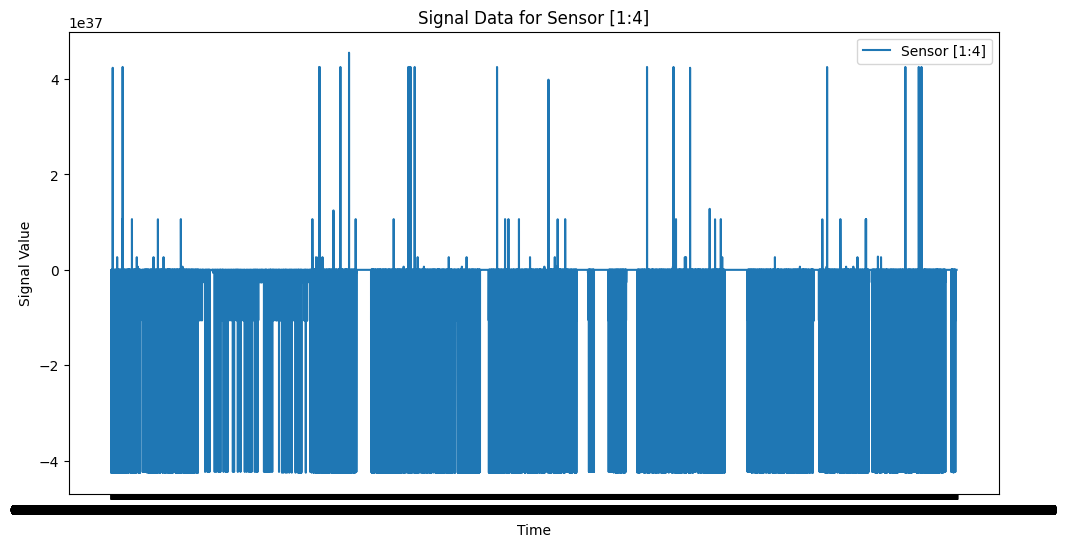

In [39]:
# Specify the sensor ID to explore
sensor_id_to_explore = '[1:4]'

# Filter data for the selected sensor
selected_data = merged_df[merged_df[sensor_id_to_explore].notnull()]

# Visualize the time series data for the selected sensor
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(selected_data['Time'], selected_data[sensor_id_to_explore], label=f'Sensor {sensor_id_to_explore}')
plt.title(f'Signal Data for Sensor {sensor_id_to_explore}')
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.legend()
plt.show()


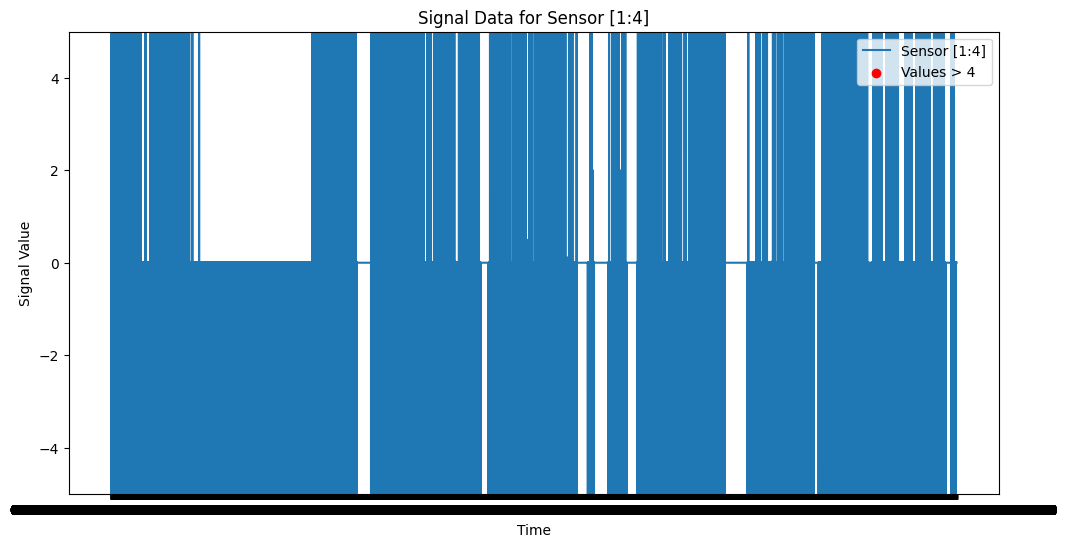

In [40]:
# Specify the sensor ID to explore
sensor_id_to_explore = '[1:4]'

# Filter data for the selected sensor
selected_data = merged_df[merged_df[sensor_id_to_explore].notnull()]

# Set y-axis limits to focus on relevant values
y_min, y_max = -5, 5  # Adjust these values based on your data

# Visualize the time series data for the selected sensor
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(selected_data['Time'], selected_data[sensor_id_to_explore], label=f'Sensor {sensor_id_to_explore}')
plt.title(f'Signal Data for Sensor {sensor_id_to_explore}')
plt.xlabel('Time')
plt.ylabel('Signal Value')
plt.ylim(y_min, y_max)  # Set y-axis limits
plt.legend()

# Highlight points with y-axis values greater than 4
highlighted_points = selected_data[selected_data[sensor_id_to_explore] > 4]
plt.scatter(highlighted_points['Time'], highlighted_points[sensor_id_to_explore], color='red', label='Values > 4')

plt.legend()
plt.show()
